In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize

In [237]:
df.to_csv('C:/Users/Progyan/Downloads/Output_clean.csv',index = False)

In [53]:
df = pd.read_csv('C:/Users/Progyan/Downloads/Output_part_cleaned.csv')

C:\Users\Progyan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (61,71,72,73,76,77,78,81,98) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [173]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,issue_d,loan_status,zip_code,inq_last_6mths,out_prncp_inv,total_pymnt,total_pymnt_inv,...,initialListStatus,applicationType,earliesCreditLine,title,policyCode,isDefault,earliesCreditLine_month,earliesCreditLine_year,issue_d_month,issue_d_year
14,24700,24700,24700.0,Dec-2015,Fully Paid,577xx,4.0,0.0,25679.660000,25679.66,...,0,0,Dec-1999,1.0,1,0.0,12,1999,12,2015
15,20000,20000,20000.0,Dec-2015,Fully Paid,605xx,0.0,0.0,22705.924294,22705.92,...,0,1,Aug-2000,2.0,1,0.0,8,2000,12,2015
16,20000,20000,20000.0,Dec-2015,Fully Paid,550xx,0.0,0.0,21393.800000,21393.80,...,1,0,Jun-1990,0.0,1,0.0,6,1990,12,2015
17,20000,20000,20000.0,Dec-2015,Fully Paid,293xx,0.0,0.0,21538.508977,21538.51,...,0,0,Feb-1999,3.0,1,0.0,2,1999,12,2015
18,10000,10000,10000.0,Dec-2015,Fully Paid,160xx,1.0,0.0,10998.971575,10998.97,...,0,0,Apr-2002,4.0,1,0.0,4,2002,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753119,21000,21000,21000.0,Feb-2017,Charged Off,751xx,0.0,0.0,9060.530000,9060.53,...,0,0,Oct-2006,4.0,1,1.0,10,2006,2,2017
753120,11000,11000,11000.0,Mar-2017,Charged Off,300xx,0.0,0.0,2554.710000,2554.71,...,0,0,Jan-1990,0.0,1,1.0,1,1990,3,2017
753121,21000,21000,21000.0,Mar-2017,Charged Off,761xx,0.0,0.0,8709.070000,8709.07,...,0,0,Feb-1998,0.0,1,1.0,2,1998,3,2017
753122,27850,27850,27850.0,Apr-2018,Charged Off,976xx,0.0,0.0,5333.520000,5333.52,...,0,0,Mar-2009,5.0,1,1.0,3,2009,4,2018


In [171]:
(df.isnull().sum() / df.shape[0] * 100)[0:50]

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
issue_d                       0.0
loan_status                   0.0
zip_code                      0.0
inq_last_6mths                0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_d                  0.0
last_pymnt_amnt               0.0
last_credit_pull_d            0.0
last_fico_range_high          0.0
last_fico_range_low           0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
application_type              0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_lim              0.0
acc_open_past_24mths          0.0
avg_cur_bal                   0.0
bc_open_to_buy                0.0
bc_util       

In [56]:
df.num_tl_120dpd_2m.isnull().sum()

66565

In [57]:
df = df.loc[df['zip_code'].notna(),:]

In [58]:
df = df.loc[df['inq_last_6mths'].notna(),:]

In [59]:
df = df.loc[df['last_pymnt_d'].notna(),:]

In [60]:
df = df.loc[df['last_credit_pull_d'].notna(),:]

In [61]:
df = df.loc[df['collections_12_mths_ex_med'].notna(),:]

In [62]:
df = df.loc[df['employmentTitle'].notna(),:]

In [63]:
df = df.loc[df['postCode'].notna(),:]

In [64]:
df = df.drop(['revol_bal_joint'],axis=1)

In [65]:
df = df.drop(['sec_app_fico_range_low'],axis=1)

In [66]:
df = df.drop(['sec_app_fico_range_high'],axis=1)

In [67]:
df = df.drop(['sec_app_earliest_cr_line'],axis=1)

In [68]:
df = df.drop(['sec_app_inq_last_6mths'],axis=1)

In [69]:
df = df.dropna(thresh=500000, axis=1)

In [70]:
df  = df.loc[df['tot_coll_amt'].notna(),:]

In [71]:
df  = df.loc[df['bc_open_to_buy'].notna(),:]

In [72]:
df  = df.loc[df['bc_util'].notna(),:]

In [73]:
df  = df.loc[df['mths_since_recent_bc'].notna(),:]

In [74]:
df  = df.loc[df['num_rev_accts'].notna(),:]

In [75]:
df  = df.loc[df['pct_tl_nvr_dlq'].notna(),:]

In [76]:
df  = df.loc[df['percent_bc_gt_75'].notna(),:]

In [77]:
df['mths_since_recent_inq'].fillna(df['mths_since_recent_inq'].median(), inplace=True)

In [78]:
df['mths_since_recent_inq'].fillna(df['mths_since_recent_inq'].median(), inplace=True)

In [79]:
df['mo_sin_old_il_acct'].fillna(df['mo_sin_old_il_acct'].median(), inplace=True)

In [80]:
df  = df.loc[df['num_tl_120dpd_2m'].notna(),:]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677934 entries, 14 to 753123
Data columns (total 94 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   677934 non-null  int64  
 1   funded_amnt                 677934 non-null  int64  
 2   funded_amnt_inv             677934 non-null  float64
 3   issue_d                     677934 non-null  object 
 4   loan_status                 677934 non-null  object 
 5   zip_code                    677934 non-null  object 
 6   inq_last_6mths              677934 non-null  float64
 7   out_prncp_inv               677934 non-null  float64
 8   total_pymnt                 677934 non-null  float64
 9   total_pymnt_inv             677934 non-null  float64
 10  total_rec_prncp             677934 non-null  float64
 11  total_rec_int               677934 non-null  float64
 12  total_rec_late_fee          677934 non-null  float64
 13  recoveries   

<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: Runt

<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: Runt

<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-234-55e12a7cc308>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


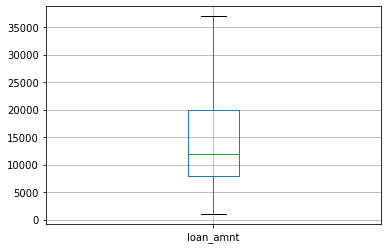

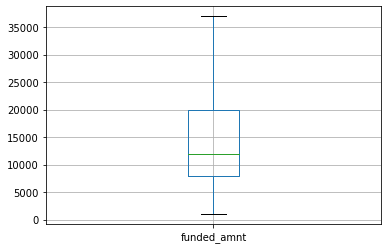

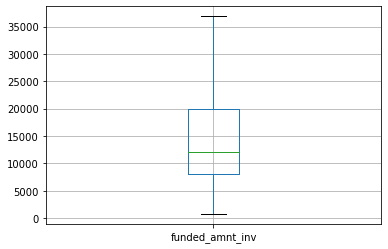

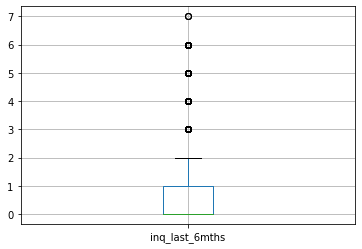

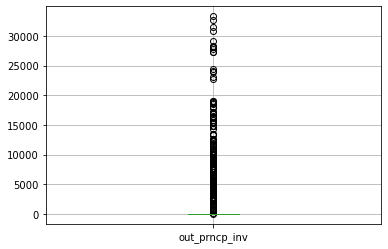

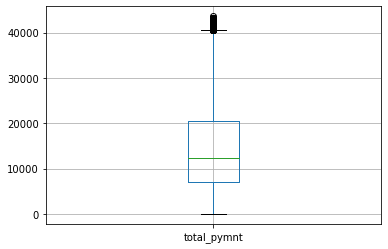

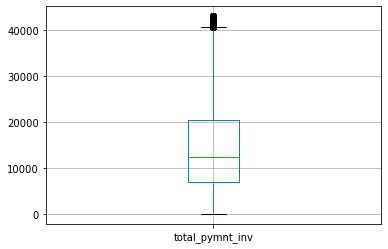

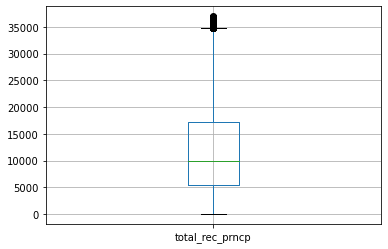

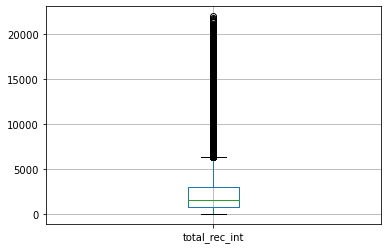

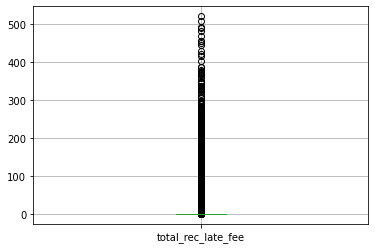

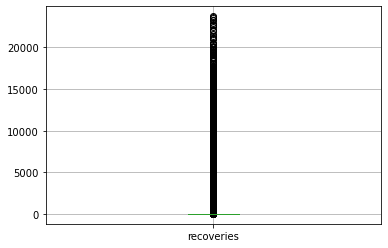

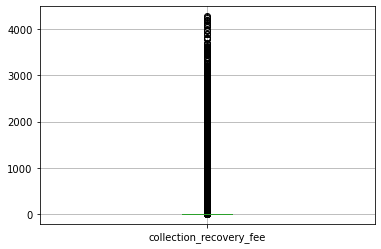

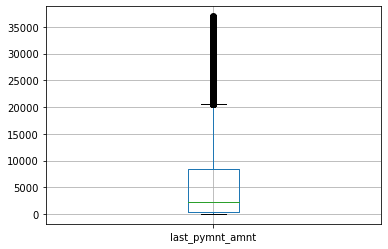

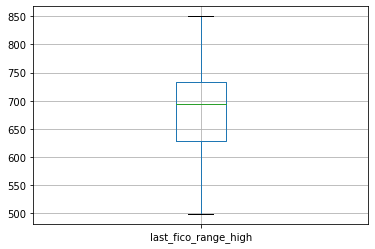

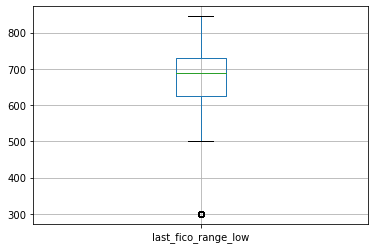

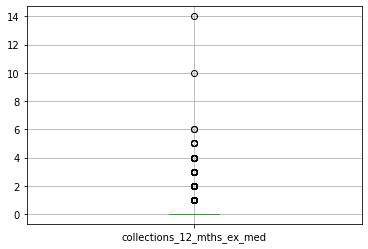

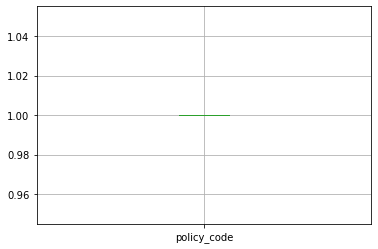

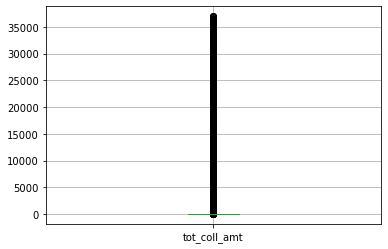

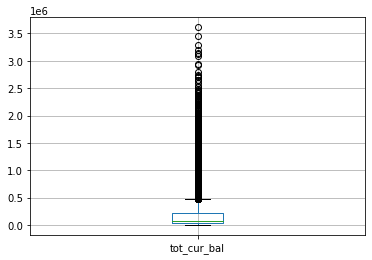

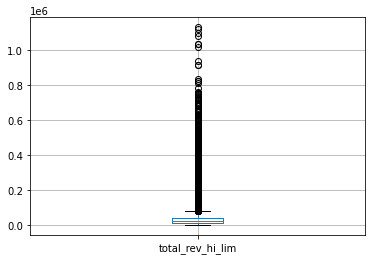

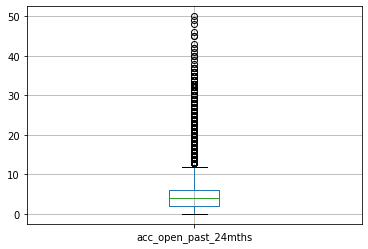

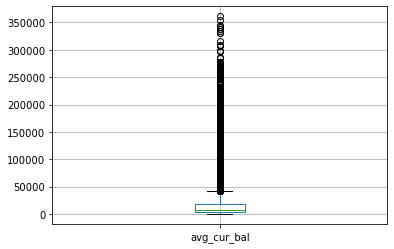

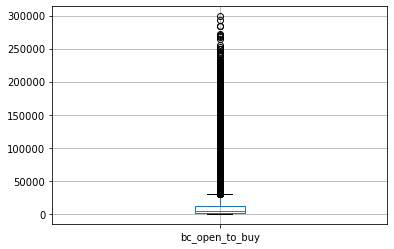

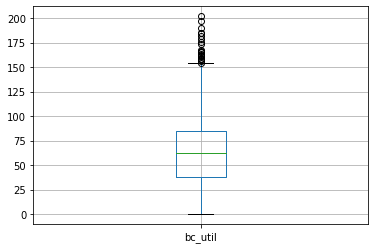

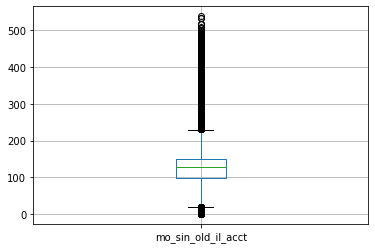

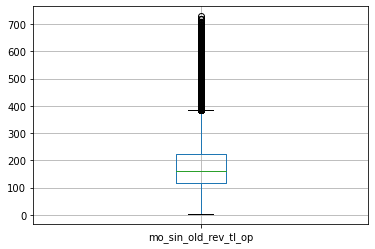

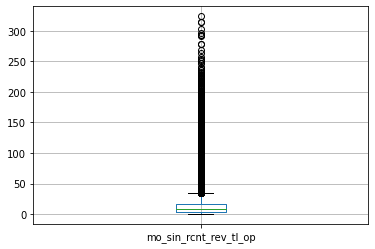

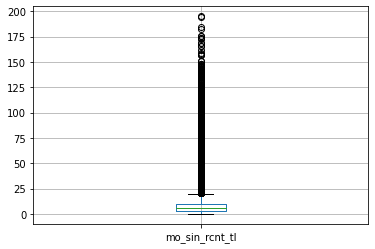

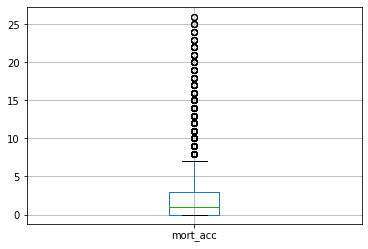

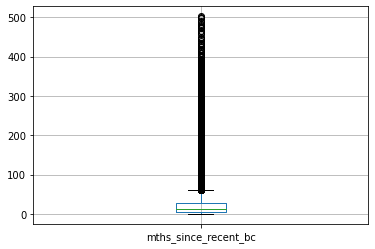

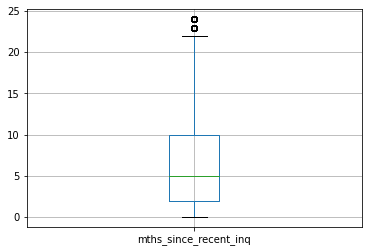

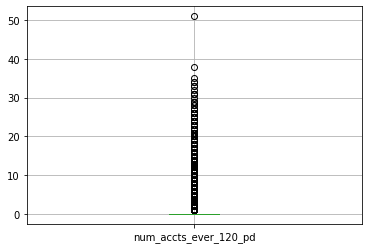

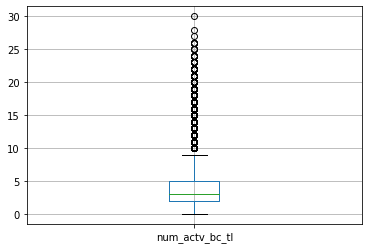

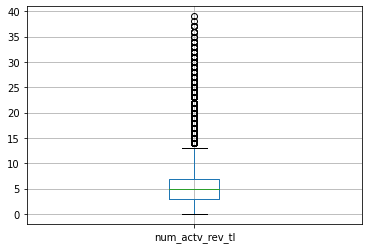

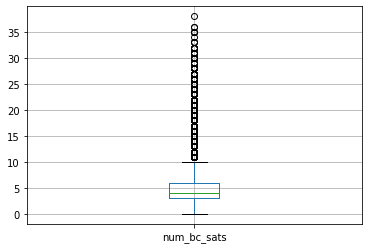

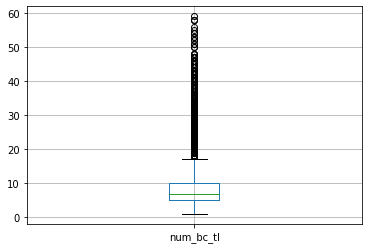

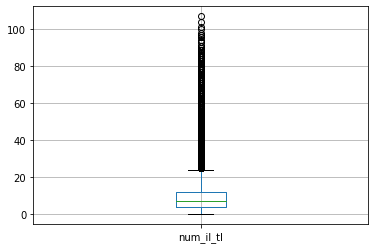

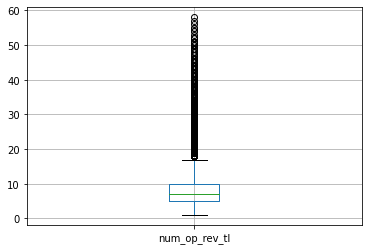

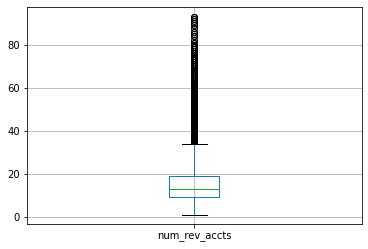

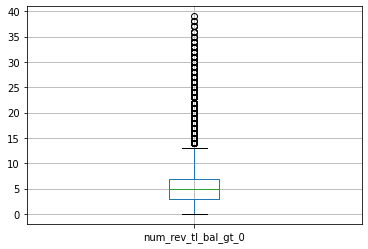

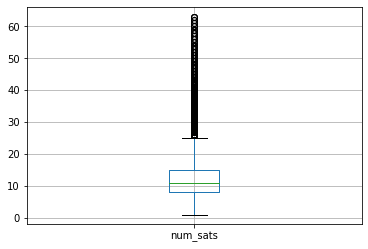

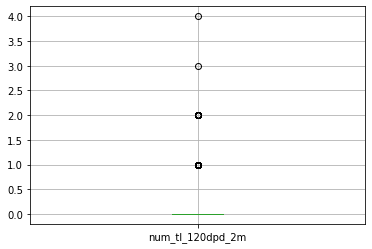

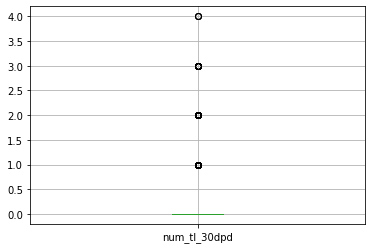

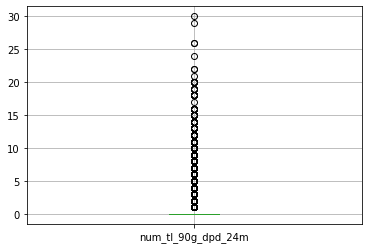

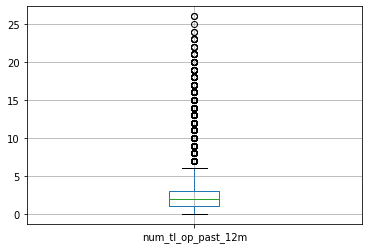

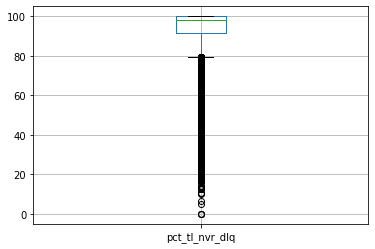

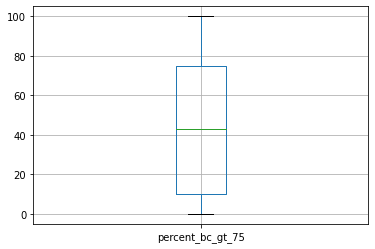

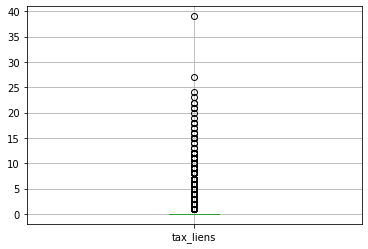

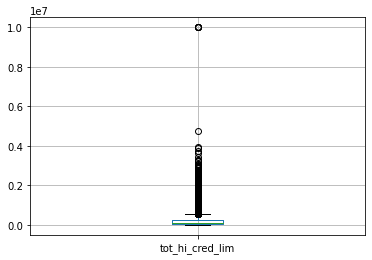

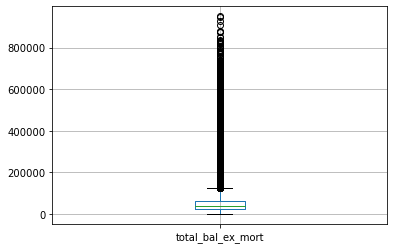

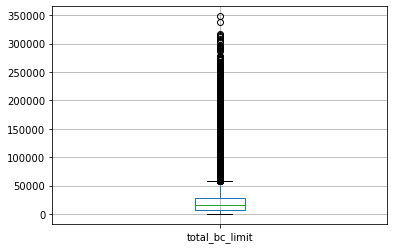

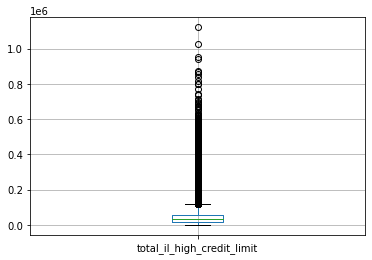

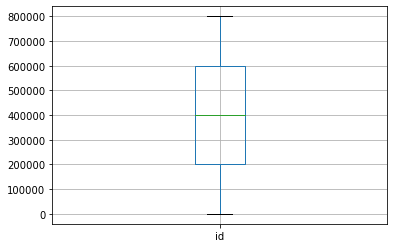

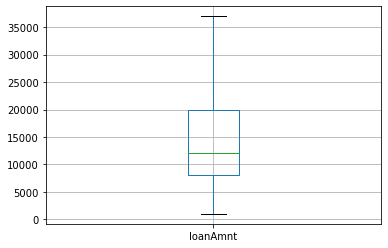

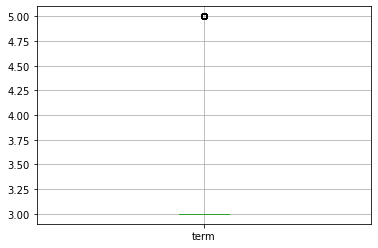

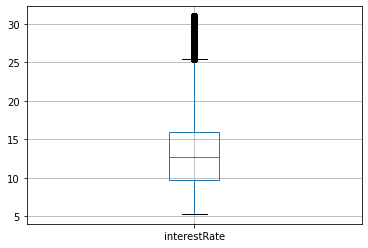

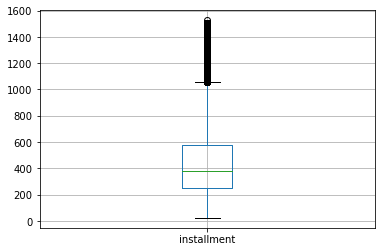

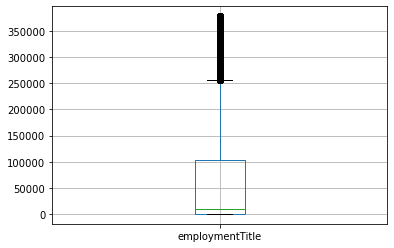

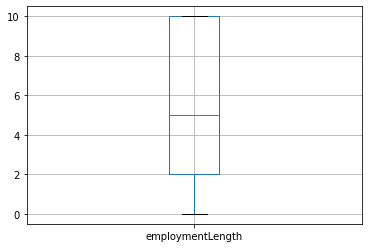

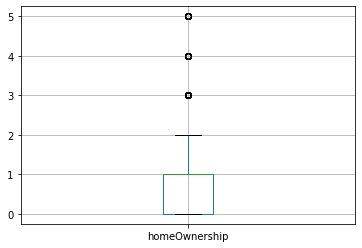

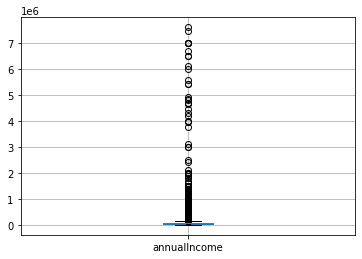

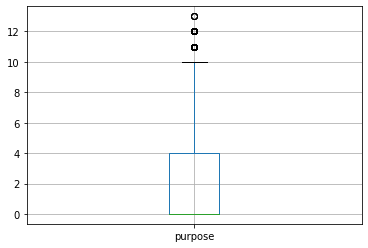

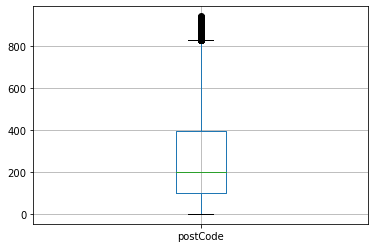

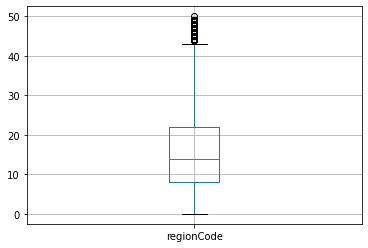

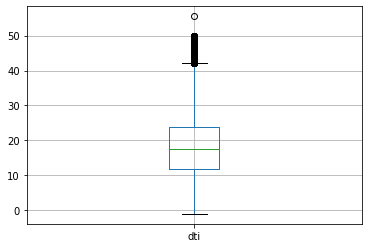

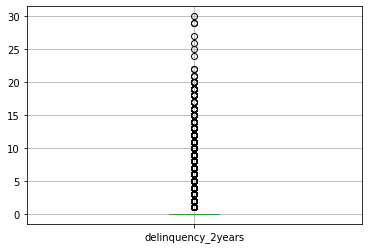

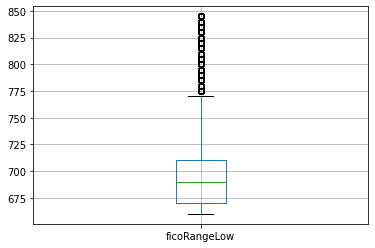

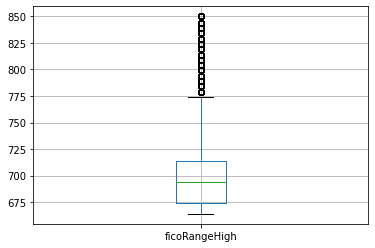

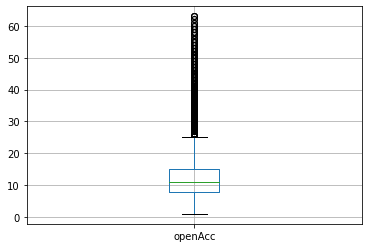

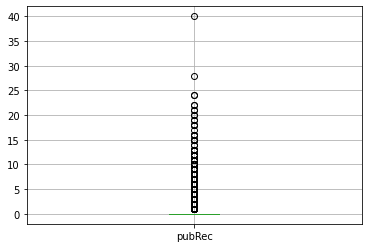

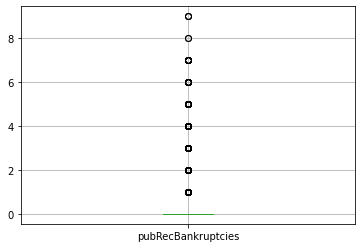

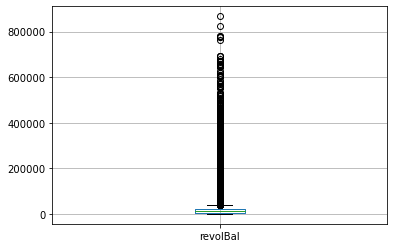

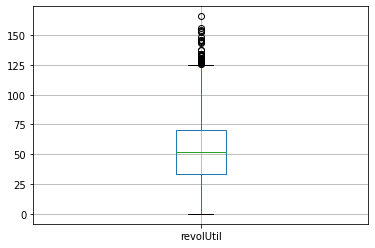

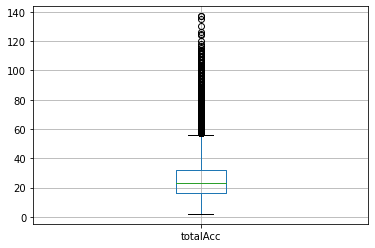

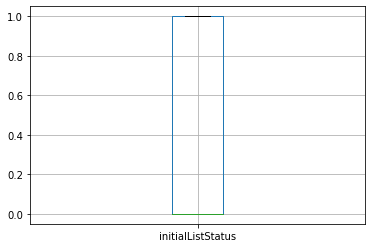

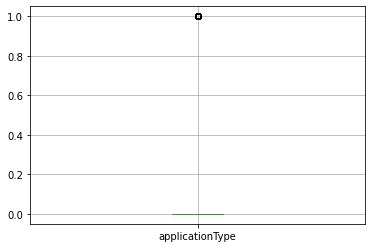

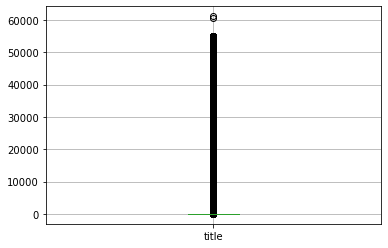

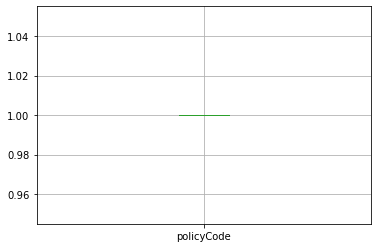

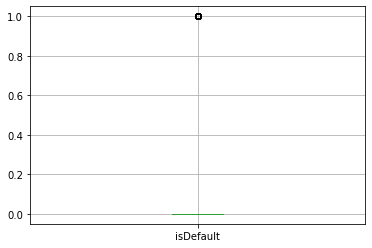

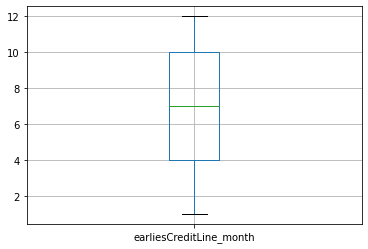

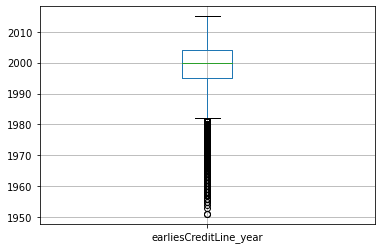

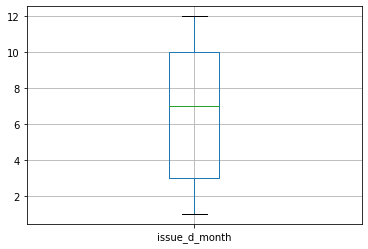

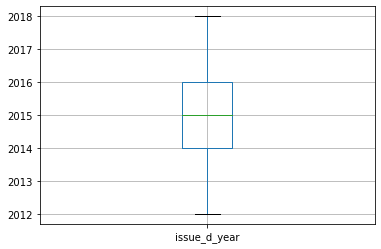

In [234]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
    plt.figure()
    df.boxplot([column])

In [85]:
df = df[df.last_fico_range_high != 0]

In [86]:
df.last_fico_range_high.min()

499

In [87]:
df.loc[df['last_fico_range_low'] ==0,'last_fico_range_high':]

,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,...,initialListStatus,applicationType,earliesCreditLine,title,policyCode,isDefault,earliesCreditLine_month,earliesCreditLine_year,issue_d_month,issue_d_year
503,499,0,0.0,1,Individual,0.0,19150.0,158100.0,8.0,1197.0,...,0,0,May-2003,6.0,1,1.0,5,2003,12,2015
532,499,0,0.0,1,Individual,0.0,148848.0,63900.0,4.0,8269.0,...,0,0,Jan-1996,5.0,1,1.0,1,1996,12,2015
547,499,0,0.0,1,Individual,0.0,21678.0,59700.0,18.0,1355.0,...,0,0,Oct-1999,4.0,1,1.0,10,1999,12,2015
554,499,0,1.0,1,Individual,0.0,377656.0,22800.0,13.0,29050.0,...,0,0,Nov-2003,0.0,1,1.0,11,2003,12,2015
669,499,0,0.0,1,Individual,205.0,162218.0,29100.0,3.0,14747.0,...,1,0,Oct-2002,0.0,1,1.0,10,2002,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752882,499,0,0.0,1,Individual,65.0,71408.0,63900.0,6.0,7934.0,...,0,0,Nov-1999,0.0,1,1.0,11,1999,1,2017
752886,499,0,0.0,1,Individual,0.0,294678.0,30100.0,4.0,22668.0,...,0,0,Oct-1999,4.0,1,1.0,10,1999,1,2017
752897,499,0,0.0,1,Individual,0.0,15606.0,35900.0,7.0,1951.0,...,0,0,Aug-1996,0.0,1,1.0,8,1996,4,2018
752898,499,0,0.0,1,Individual,0.0,355703.0,70900.0,3.0,35570.0,...,0,0,Apr-2000,5.0,1,1.0,4,2000,1,2017


In [88]:
x = df.loc[:,'last_fico_range_low'].replace(0,300)
df.loc[:,'last_fico_range_low'] = x.copy()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677630 entries, 14 to 753123
Data columns (total 94 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   677630 non-null  int64  
 1   funded_amnt                 677630 non-null  int64  
 2   funded_amnt_inv             677630 non-null  float64
 3   issue_d                     677630 non-null  object 
 4   loan_status                 677630 non-null  object 
 5   zip_code                    677630 non-null  object 
 6   inq_last_6mths              677630 non-null  float64
 7   out_prncp_inv               677630 non-null  float64
 8   total_pymnt                 677630 non-null  float64
 9   total_pymnt_inv             677630 non-null  float64
 10  total_rec_prncp             677630 non-null  float64
 11  total_rec_int               677630 non-null  float64
 12  total_rec_late_fee          677630 non-null  float64
 13  recoveries   

In [232]:
df.loc[df.total_il_high_credit_limit>1200000,:]

,loan_amnt,funded_amnt,funded_amnt_inv,issue_d,loan_status,zip_code,inq_last_6mths,out_prncp_inv,total_pymnt,total_pymnt_inv,...,initialListStatus,applicationType,earliesCreditLine,title,policyCode,isDefault,earliesCreditLine_month,earliesCreditLine_year,issue_d_month,issue_d_year
675018,35000,35000,35000.0,Nov-2017,Fully Paid,303xx,0.0,0.0,36291.405854,36291.41,...,0,0,May-2000,0.0,1,0.0,5,2000,11,2017


In [93]:
df = df.loc[df.tot_coll_amt<37000,:]

In [99]:
df = df.loc[df.funded_amnt<37000,:]

In [107]:
df = df.loc[df.total_pymnt<45000,:]

In [111]:
df = df.loc[df.total_pymnt_inv<43000,:]

In [116]:
df = df.loc[df.total_rec_int<22000,:]

In [118]:
df = df.loc[df.total_rec_late_fee<550,:]

In [120]:
df = df.loc[df.recoveries<24000,:]

In [123]:
df = df.loc[df.last_pymnt_amnt<37000,:]

In [125]:
df = df.loc[df.tot_cur_bal<4000000,:]

In [127]:
df = df.loc[df.total_rev_hi_lim<8000000,:]

In [130]:
df = df.loc[df.acc_open_past_24mths<55,:]

In [132]:
df = df.loc[df.avg_cur_bal<370000,:]

In [134]:
df = df.loc[df.bc_open_to_buy<310000,:]

In [138]:
df = df.loc[df.mo_sin_old_il_acct<600,:]

In [143]:
df = df.loc[df.mo_sin_old_rev_tl_op<730,:]

In [145]:
df = df.loc[df.mo_sin_rcnt_rev_tl_op<330,:]

In [147]:
df = df.loc[df.mo_sin_rcnt_tl<200,:]

In [150]:
df = df.loc[df.mort_acc<27,:]

In [154]:
df = df.loc[df.mths_since_recent_bc<510,:]

In [158]:
df = df.loc[df.num_actv_rev_tl<40,:]

In [160]:
df = df.loc[df.num_bc_sats<40,:]

In [162]:
df = df.loc[df.num_bc_tl<60,:]

In [165]:
df = df.loc[df.num_il_tl<110,:]

In [169]:
df = df.loc[df.num_op_rev_tl<60,:]

In [175]:
df = df.loc[df.num_rev_accts<100,:]

In [179]:
df = df.loc[df.num_sats<70,:]

In [181]:
df = df.loc[df.num_tl_op_past_12m<27,:]

In [183]:
df = df.loc[df.tax_liens<80,:]

In [186]:
df = df.loc[df.total_bal_ex_mort<3000000,:]

In [189]:
df = df.loc[df.total_bc_limit<450000,:]

In [191]:
df = df.loc[df.total_il_high_credit_limit<1700000,:]

In [194]:
df = df.loc[df.annualIncome<8000000,:]

In [197]:
df = df.loc[df.dti<60,:]

In [199]:
df = df.loc[df.delinquency_2years<35,:]

In [204]:
df = df.loc[df.openAcc<65,:]

In [206]:
df = df.loc[df.pubRec<50,:]

In [208]:
df = df.loc[df.revolBal<1600000,:]

In [210]:
df = df.loc[df.revolUtil<175,:]

In [213]:
df = df.loc[df.total_rev_hi_lim<1500000,:]

In [216]:
df = df.loc[df.bc_util<225,:]

In [221]:
df = df.loc[df.mo_sin_old_il_acct<600,:]

In [223]:
df = df.loc[df.tax_liens<40,:]

In [227]:
df = df.loc[df.total_bal_ex_mort<1000000,:]

In [231]:
df = df.loc[df.total_bc_limit<375000,:]

In [233]:
df = df.loc[df.total_il_high_credit_limit<1200000,:]

In [235]:
df.shape

(664278, 94)